In [12]:
cd ..

/home/astro/phrdhx


## Datagap Issues
- I noticed that setting the datagpas to zero did not work for some reason. This wouldn't have been an issue for (likely) most of the lightcurves, but we may still encounter the problem where the deepest transit will be the datagap, and the box search takes the datagap as the deeepest transit.
- This notebook breaks this down to see where the problems lie.
    - Conclusion is that for `Wotan` specified methods, the smoothing must be done first before interpolation of data points. `Wotan` does not take into account the datagap when smoothing lightcurves, so by interpolating beforehand you mistakenly feed fake data into the filter.

In [ ]:
from analysis_tools_cython import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 3]


In [ ]:
table, lc_info = import_XRPlightcurve('betapic/xrp/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl',sector=6)
table = table['time','corrected flux','quality']

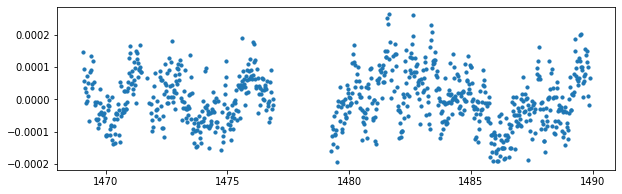

In [ ]:
plt.scatter(table['time'], normalise_flux(table['corrected flux']),s=10)

In [ ]:
t, flux, quality, real = clean_data(table)
flux = normalise_flux(flux)

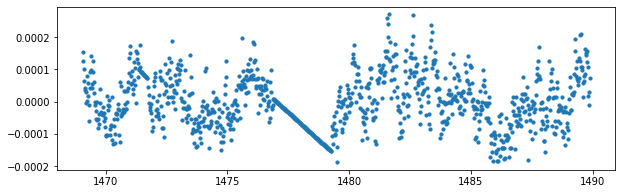

In [ ]:
plt.scatter(t, flux, s=10)

---

In [ ]:
table2, _ = import_lightcurve('betapic/test/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits')

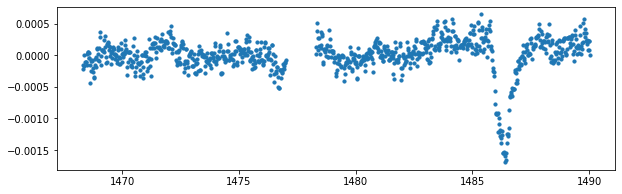

In [ ]:
plt.scatter(table2['TIME'], normalise_flux(table2['PDCSAP_FLUX']),s=10)

In [ ]:
table2[table2['TIME'] >= 1478.1]

TIME,PDCSAP_FLUX,QUALITY
float64,float32,int32
1478.283279227912,5508577.5,0
1478.3041124899926,5509140.0,0
1478.324945752771,5510559.0,0
1478.3457790161322,5511271.5,0
1478.3666122800748,5509963.5,0
1478.3874455444827,5508930.5,0
1478.4082788094727,5509212.0,0
1478.4291120748128,5509963.5,0
1478.470778606424,5508558.5,0


In [ ]:
t, flux, quality, real = clean_data(table2)
#flux = normalise_flux(flux)

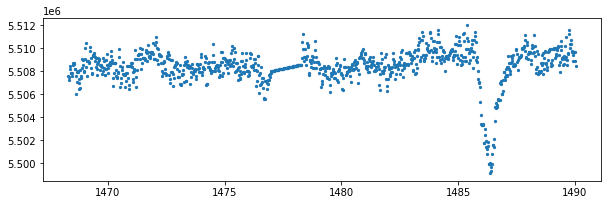

In [ ]:
plt.scatter(t, flux, s=5)


---

In [ ]:
from wotan import flatten

In [ ]:
flattened_flux, trend_lc = flatten(time=t,flux=flux,method='mean',window_length=2.5,return_trend=True)

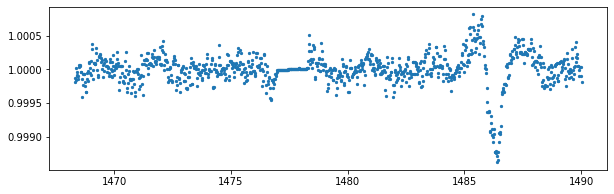

In [ ]:
plt.scatter(t, flattened_flux, s=5)
#plt.scatter(t, normalise_lc(trend_lc), s=5)


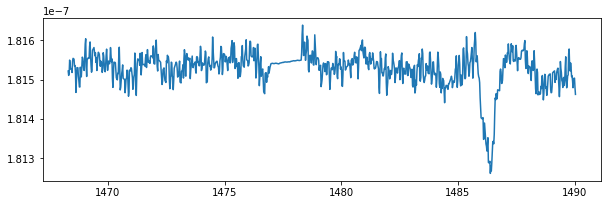

In [ ]:
test = flattened_flux/trend_lc
plt.plot(t,test)

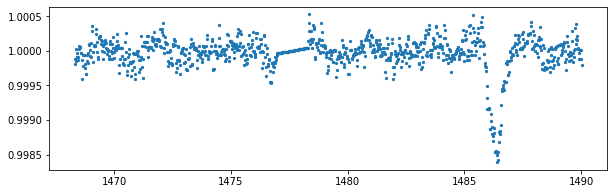

In [ ]:
plt.scatter(t, flattened_flux, s=5)


In [ ]:
kep, _ = import_lightcurve('kepler/kplr003542116-2012088054726_llc.fits')

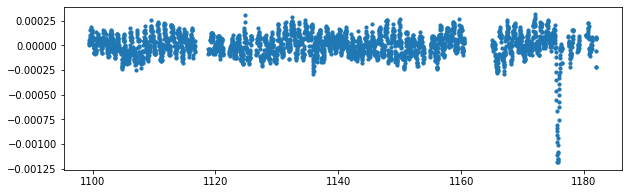

In [ ]:
plt.scatter(kep['TIME'],normalise_flux(kep['PDCSAP_FLUX']),s=10)

In [ ]:
t, flux, quality, real = clean_data(kep)
flux = normalise_flux(flux)
flux *= real

(1160.0, 1170.0)

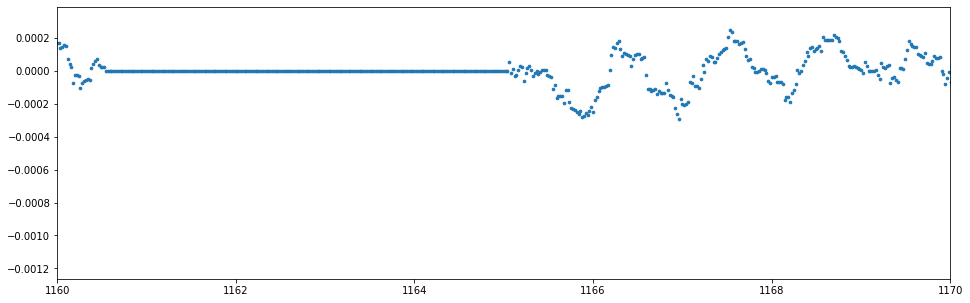

In [ ]:
plt.figure(figsize=(16,5))
plt.scatter(t, flux,s=7)
plt.xlim([1160,1170])

In [ ]:
flux[1160]

1.5566087425256114e-05

In [14]:
from wotan import flatten

In [16]:
table, lc_info = import_XRPlightcurve('betapic/xrp/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl',sector=6)
#table = table['time','corrected flux','quality']

FileNotFoundError: [Errno 2] No such file or directory: 'betapic/xrp/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl'

In [ ]:
filter_table(table)

time,corrected flux,quality
float64,float64,int32
1469.05418151656,347154.0474762639,0
1469.0958481427742,347135.54636229546,0
1469.1166814577352,347122.48446406104,0
1469.1375147737685,347115.2081440332,0
1469.1791814084336,347110.70301108615,0
1469.2000147267115,347099.42433376826,0
1469.2208480453587,347101.73745537805,0
1469.2416813641646,347128.3496696504,0
1469.2625146829143,347106.312755302,0


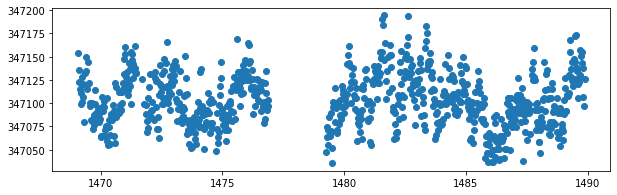

In [ ]:
plt.scatter(table['time'],table['corrected flux'])

In [ ]:
flat = flatten(table['time'], table['corrected flux'], method='median', window_length=1)

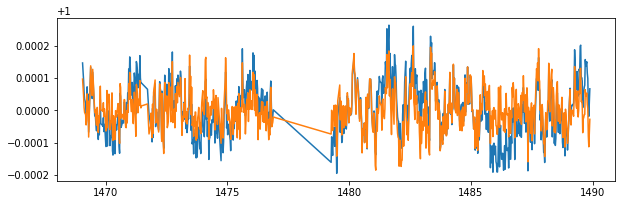

In [ ]:
plt.plot(table['time'],normalise_lc(table['corrected flux']))
plt.plot(table['time'],flat)

In [ ]:
table['corrected flux'] = flat - np.ones(len(flat))

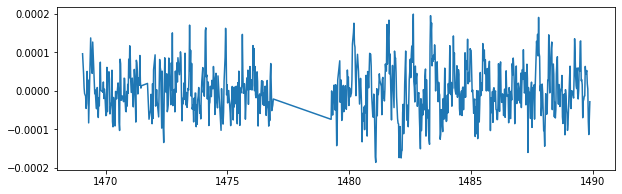

In [ ]:
plt.plot(table['time'],(table['corrected flux']))


In [ ]:
t, flux, quality, real = clean_data(table)

In [ ]:
flux *= real

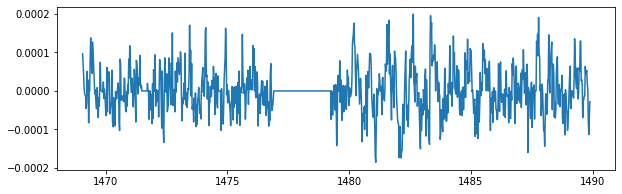

In [ ]:
plt.plot(t, flux)

---

In [ ]:
a = np.load('/storage/astro2/phrdhx/tesslcs/lc_arraydata/tesslc_140757321.npz')

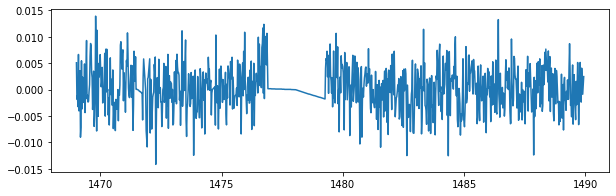

In [ ]:
plt.plot(a['time'],a['flux'])

In [13]:
from wotan import flatten